# 20 NG

In [2]:
import pandas as pd
df = pd.read_csv('20ng.csv')
df.head()

,index,content
0,alt.atheism49960,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1,alt.atheism51060,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
2,alt.atheism51119,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
3,alt.atheism51120,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
4,alt.atheism51121,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...


In [3]:
df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

In [4]:
df['index'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [5]:
classes = ["alt.atheism", "sci.med", "sci.electronics",
           "comp.graphics", "talk.politics.guns", "sci.crypt"]

sub_df = df[df['index'].isin(classes)]
sub_df.shape

(6000, 2)

In [6]:
sub_df.isnull().sum()

index      0
content    0
dtype: int64

## Implementing TF


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False)
sparse_matrix = vectorizer.fit_transform(sub_df['content'])
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    sparse_matrix, columns=vectorizer.get_feature_names_out())

In [8]:
sparse_df_mean = sparse_df.mean(axis=0)

In [9]:
sparse_std_sub = sparse_df.sparse.to_dense().std(axis=0)

In [10]:
sparse_df = (sparse_df - sparse_df_mean)/sparse_std_sub

In [11]:
sparse_df.shape

(6000, 77264)

In [12]:
sparse_df

,00,000,0000,00000000,00000000b,00000001,00000001b,00000010,00000010b,00000011,...,²ķ,áait,áon,íte,ýé,ťe,ťgligent,ťlangea,ťrale,ťre
0,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
1,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
2,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
3,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
4,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
5996,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
5997,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291
5998,-0.307979,-0.101441,-0.091717,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,...,-0.018114,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291,-0.01291


## Euclidian Distance Library


In [13]:
from sklearn.metrics.pairwise import euclidean_distances

ecludian_distance_matrix = euclidean_distances(sparse_df)
ecludian_distance_df = pd.DataFrame(
    ecludian_distance_matrix, index=sparse_df.index, columns=sparse_df.index)

In [14]:
ecludian_distance_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000000,873.190893,730.666937,742.319988,777.846929,717.906432,745.850973,706.920736,700.509025,704.366724,...,728.432694,748.979036,707.047078,737.976749,738.198392,732.560783,704.347523,746.614741,707.936285,722.938364
1,873.190893,0.000000,611.524685,625.097856,667.430043,596.119692,629.725129,583.129675,574.886562,579.918532,...,609.175606,633.337253,583.445810,620.292013,620.652386,613.894695,580.041999,631.246397,584.330250,602.452264
2,730.666937,611.524685,0.000000,401.075531,463.252497,352.614379,407.320624,328.507317,316.436954,324.987768,...,374.535270,412.845622,331.066062,392.090900,392.908928,382.311368,324.981772,409.537522,332.683276,363.412422
3,742.319988,625.097856,401.075531,0.000000,481.318572,377.766131,427.852245,356.074635,342.029673,350.324639,...,396.874504,432.965276,356.064944,414.264150,414.240247,403.953371,350.302539,429.974044,357.581582,386.415163
4,777.846929,667.430043,463.252497,481.318572,0.000000,442.998617,486.288833,424.854621,413.772509,419.867894,...,459.595801,490.970895,424.860933,474.766208,474.606927,465.739594,419.836722,488.467587,425.837663,450.413129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,732.560783,613.894695,382.311368,403.953371,465.739594,357.319011,410.233638,334.772273,320.508176,328.512816,...,377.509711,415.515034,334.132979,395.995785,395.923338,0.000000,328.481480,412.138021,336.030244,366.595057
5996,704.347523,580.041999,324.981772,350.302539,419.836722,295.637292,357.266527,267.302979,249.264152,259.439147,...,319.375788,363.066969,266.947491,340.936263,340.578044,328.481480,0.000000,359.596858,268.544179,306.050129
5997,746.614741,631.246397,409.537522,429.974044,488.467587,386.384163,435.640962,365.638466,352.104362,360.026907,...,405.061656,440.484199,365.204138,422.276742,422.105852,412.138021,359.596858,0.000000,366.616433,394.839315
5998,707.936285,584.330250,332.683276,357.581582,425.837663,303.968772,364.258007,276.683808,259.245594,268.966855,...,327.146036,369.970666,276.346124,348.191442,348.100177,336.030244,268.544179,366.616433,0.000000,314.290509


## Euclidian Distance Own Code


In [39]:
def euclidean_distances(mat):
    from tqdm import tqdm

    if isinstance(mat, (pd.DataFrame, pd.Series)):
        mat = mat.to_numpy()

    dot_product = np.dot(mat, mat.T)
    xi2 = np.sum(mat**2, axis=1)
    n = len(xi2)
    distances = np.zeros((n, n))

    for i in tqdm(range(n)):
        for j in range(n):
            distances[i, j] = np.sqrt(
                xi2[i] + xi2[j] - (2 * dot_product[i, j]))

    return distances


distances = euclidean_distances(sparse_df)

  0%|          | 0/6000 [00:00<?, ?it/s]/tmp/ipykernel_109095/4233361964.py:14: RuntimeWarning: invalid value encountered in sqrt
  distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))
100%|██████████| 6000/6000 [00:40<00:00, 149.57it/s]


In [38]:
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000919,873.190893,730.666937,742.319988,777.846929,717.906432,745.850973,706.920736,700.509025,704.366724,...,728.432694,748.979036,707.047078,737.976749,738.198392,732.560783,704.347523,746.614741,707.936285,722.938364
1,873.190893,0.000499,611.524685,625.097856,667.430043,596.119692,629.725129,583.129675,574.886562,579.918532,...,609.175606,633.337253,583.445810,620.292013,620.652386,613.894695,580.041999,631.246397,584.330250,602.452264
2,730.666937,611.524685,NaN,401.075531,463.252497,352.614379,407.320624,328.507317,316.436954,324.987768,...,374.535270,412.845622,331.066062,392.090900,392.908928,382.311368,324.981772,409.537522,332.683276,363.412422
3,742.319988,625.097856,401.075531,NaN,481.318572,377.766131,427.852245,356.074635,342.029673,350.324639,...,396.874504,432.965276,356.064944,414.264150,414.240247,403.953371,350.302539,429.974044,357.581582,386.415163
4,777.846929,667.430043,463.252497,481.318572,NaN,442.998617,486.288833,424.854621,413.772509,419.867894,...,459.595801,490.970895,424.860933,474.766208,474.606927,465.739594,419.836722,488.467587,425.837663,450.413129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,732.560783,613.894695,382.311368,403.953371,465.739594,357.319011,410.233638,334.772273,320.508176,328.512816,...,377.509711,415.515034,334.132979,395.995785,395.923338,NaN,328.481480,412.138021,336.030244,366.595057
5996,704.347523,580.041999,324.981772,350.302539,419.836722,295.637292,357.266527,267.302979,249.264152,259.439147,...,319.375788,363.066969,266.947491,340.936263,340.578044,328.481480,NaN,359.596858,268.544179,306.050129
5997,746.614741,631.246397,409.537522,429.974044,488.467587,386.384163,435.640962,365.638466,352.104362,360.026907,...,405.061656,440.484199,365.204138,422.276742,422.105852,412.138021,359.596858,NaN,366.616433,394.839315
5998,707.936285,584.330250,332.683276,357.581582,425.837663,303.968772,364.258007,276.683808,259.245594,268.966855,...,327.146036,369.970666,276.346124,348.191442,348.100177,336.030244,268.544179,366.616433,NaN,314.290509


## Cosine Similarity


In [45]:
import numpy as np


def cosine_similarity_custom(mat):

    if isinstance(mat, (pd.DataFrame, pd.Series)):
        mat = mat.to_numpy()

    dot_product = np.dot(mat, mat.T)
    norms = np.linalg.norm(mat, axis=1)
    cosine_similarity_matrix = dot_product / np.outer(norms, norms)
    return cosine_similarity_matrix


distances = cosine_similarity_custom(sparse_df)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,1.000000,0.002682,-0.000386,-0.000160,-0.000862,0.000379,-0.000930,-0.000232,-0.001356,-0.002092,...,-0.000678,-0.001321,-0.000885,-0.000435,-0.001142,-0.001201,-0.001980,0.000748,-0.002057,-0.001408
1,0.002682,1.000000,0.001038,0.002320,-0.000783,0.002691,-0.000335,0.000795,0.002383,-0.000793,...,-0.000651,-0.000508,-0.000901,0.000672,-0.000582,-0.000440,-0.001499,-0.000556,-0.001310,-0.000903
2,-0.000386,0.001038,1.000000,-0.000544,-0.000984,0.007846,-0.001238,0.014985,0.000778,-0.002091,...,-0.000736,-0.001395,-0.001175,0.003284,-0.000558,-0.001103,-0.002045,-0.001038,-0.002407,-0.000743
3,-0.000160,0.002320,-0.000544,1.000000,-0.000104,-0.001140,-0.000605,-0.000628,0.004558,-0.000690,...,-0.000612,-0.000063,-0.000513,-0.000782,-0.000369,0.000387,-0.000543,-0.000479,-0.001703,-0.000721
4,-0.000862,-0.000783,-0.000984,-0.000104,1.000000,-0.000393,0.000429,-0.001063,-0.001065,-0.000058,...,-0.000938,0.000101,-0.001056,-0.001351,-0.000419,-0.000209,0.000135,-0.000780,-0.000294,-0.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.001201,-0.000440,-0.001103,0.000387,-0.000209,0.000788,-0.000708,-0.001226,-0.000612,-0.000425,...,0.000888,0.000122,0.002875,-0.000674,0.000018,1.000000,-0.000212,0.000935,-0.000234,0.000341
5996,-0.001980,-0.001499,-0.002045,-0.000543,0.000135,-0.002521,-0.000487,-0.001360,-0.000843,-0.000287,...,0.000526,0.002321,0.001395,-0.001131,0.001669,-0.000212,1.000000,0.001029,0.002585,0.002023
5997,0.000748,-0.000556,-0.001038,-0.000479,-0.000780,0.000219,-0.000326,-0.001671,0.002296,-0.001703,...,0.000699,0.001005,0.001023,-0.000352,0.000746,0.000935,0.001029,1.000000,0.000259,0.000575
5998,-0.002057,-0.001310,-0.002407,-0.001703,-0.000294,-0.002167,-0.000722,-0.002456,-0.001741,-0.000574,...,0.000382,0.001774,0.000072,-0.000944,0.000071,-0.000234,0.002585,0.000259,1.000000,0.000856


## KNN Library


In [15]:
sub_df.shape

(6000, 2)

In [16]:
ecludian_distance_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000000,873.190893,730.666937,742.319988,777.846929,717.906432,745.850973,706.920736,700.509025,704.366724,...,728.432694,748.979036,707.047078,737.976749,738.198392,732.560783,704.347523,746.614741,707.936285,722.938364
1,873.190893,0.000000,611.524685,625.097856,667.430043,596.119692,629.725129,583.129675,574.886562,579.918532,...,609.175606,633.337253,583.445810,620.292013,620.652386,613.894695,580.041999,631.246397,584.330250,602.452264
2,730.666937,611.524685,0.000000,401.075531,463.252497,352.614379,407.320624,328.507317,316.436954,324.987768,...,374.535270,412.845622,331.066062,392.090900,392.908928,382.311368,324.981772,409.537522,332.683276,363.412422
3,742.319988,625.097856,401.075531,0.000000,481.318572,377.766131,427.852245,356.074635,342.029673,350.324639,...,396.874504,432.965276,356.064944,414.264150,414.240247,403.953371,350.302539,429.974044,357.581582,386.415163
4,777.846929,667.430043,463.252497,481.318572,0.000000,442.998617,486.288833,424.854621,413.772509,419.867894,...,459.595801,490.970895,424.860933,474.766208,474.606927,465.739594,419.836722,488.467587,425.837663,450.413129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,732.560783,613.894695,382.311368,403.953371,465.739594,357.319011,410.233638,334.772273,320.508176,328.512816,...,377.509711,415.515034,334.132979,395.995785,395.923338,0.000000,328.481480,412.138021,336.030244,366.595057
5996,704.347523,580.041999,324.981772,350.302539,419.836722,295.637292,357.266527,267.302979,249.264152,259.439147,...,319.375788,363.066969,266.947491,340.936263,340.578044,328.481480,0.000000,359.596858,268.544179,306.050129
5997,746.614741,631.246397,409.537522,429.974044,488.467587,386.384163,435.640962,365.638466,352.104362,360.026907,...,405.061656,440.484199,365.204138,422.276742,422.105852,412.138021,359.596858,0.000000,366.616433,394.839315
5998,707.936285,584.330250,332.683276,357.581582,425.837663,303.968772,364.258007,276.683808,259.245594,268.966855,...,327.146036,369.970666,276.346124,348.191442,348.100177,336.030244,268.544179,366.616433,0.000000,314.290509


In [17]:
ecludian_distance_df['class'] = sub_df['index']

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(ecludian_distance_df['class'])
X = sparse_df.to_numpy()

In [22]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [23]:
# This is validation split
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

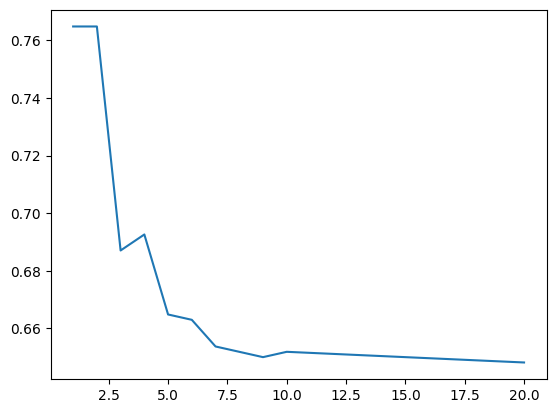

In [24]:
# cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_vals = [i for i in range(1, 11)] + [20]
accuracies = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_val, y_train_val)
    y_pred = knn.predict(X_test_val)
    acc = accuracy_score(y_test_val, y_pred)
    accuracies.append(acc)

plt.plot(k_vals, accuracies)

In [25]:
# final accuracy
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.7683333333333333

## Own Implementation


In [26]:
class KNNClassifier():
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def calculate_euclidian_similarity_btn_train_test(self, X_train, X_test):
        from tqdm import tqdm
        import os
        import numpy as np

        n = X_train.shape[0]
        m = X_test.shape[0]
        distances = np.zeros((m, n))

        for row1 in tqdm(range(m), unit="row"):
            for row2 in range(n):
                distances[row1, row2] = np.sqrt(
                    np.sum((X_train[row2] - X_test[row1]) ** 2))
        return distances

    def predict(self, X_test):
        from scipy.stats import mode
        n = X_test.shape[0]
        predicted_labels = []

        distance = self.calculate_euclidian_similarity_btn_train_test(
            self.X_train, X_test)
        distance1 = distance
        for row in range(n):
            current_data_point = distance[row]
            smallest_indices = np.argpartition(
                current_data_point, self.k)[:self.k]
            labels = self.y_train[smallest_indices]
            classified_label = np.uint8(mode(labels).mode[0])
            predicted_labels.append(classified_label)

        predicted_labels = np.array(predicted_labels, dtype=np.uint8)
        return predicted_labels

100%|██████████| 540/540 [05:33<00:00,  1.62row/s]
/tmp/ipykernel_155194/3127197564.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])
100%|██████████| 540/540 [05:30<00:00,  1.63row/s]
/tmp/ipykernel_155194/3127197564.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepte

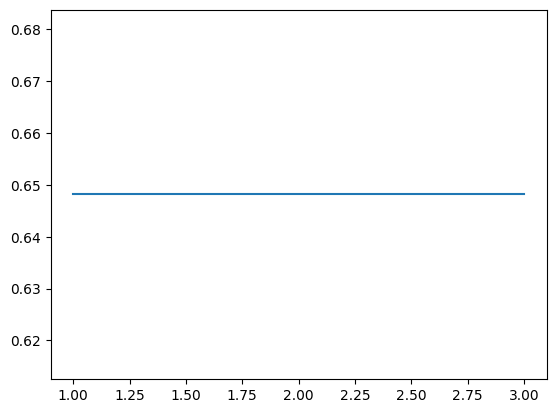

In [29]:
# cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

k_vals = [i for i in range(1, 4)]
accuracies = []

for k1 in k_vals:
    knn = KNNClassifier(k=k)
    knn.fit(X_train_val, y_train_val)
    y_pred = knn.predict(X_test_val)
    acc = accuracy_score(y_test_val, y_pred)
    accuracies.append(acc)

plt.plot(k_vals, accuracies)

In [30]:
# final accuracy
knn = KNNClassifier(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

100%|██████████| 600/600 [06:52<00:00,  1.46row/s]
/tmp/ipykernel_155194/3127197564.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classified_label = np.uint8(mode(labels).mode[0])


0.7683333333333333